In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix

In questa lezione, vedremo come usare un algoritmo di classificazione a partire da un dataset generato automaticamente.

## Generazione dei dati

Scikit Learn ci offre una serie di tool per generare automaticamente dei dati, onde familiarizzare con la libreria e con gli altri strumenti a nostra disposizione. In particolare, usiamo il metodo [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) del package `sklearn.datasets`.

In [2]:
X, y = make_classification(n_samples=1000, n_informative=5, n_classes=5, random_state=42)

## Definizione di set di training e di test

A questo punto, possiamo usare il metodo `train_test_split` per suddividere i dati in due parti, ovvero un *training set* ed un *test set*. Di default, questo metodo suddivide i dati in un 70% di training ed un 30% di test; lasciamo questa suddivisione.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Possiamo adesso creare il nostro primo classificatore, che sarà basato su un albero decisionale, e provare ad addestrarlo sui dati a nostra disposizione. In tal senso, dovremo chiamare il metodo `fit()`, passando ovviamente i dati appartenenti al set di training.

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Una volta completato l'addestramento, potremo usare il metodo `predict()` sui dati di test, che ci permette di ottenere i valori predetti per ciascuna classe.

In [5]:
y_pred = clf.predict(X_test)

Possiamo infine provare a valutare i punteggi di accuracy, recall e precision, e visualizzare la matrice di confusione.

In [6]:
print("Accuracy: {} \nRecall: {} \nPrecision: {}".format(accuracy_score(y_pred, y_test),
               recall_score(y_pred, y_test, average='micro'),
               precision_score(y_pred, y_test, average='micro')))

Accuracy: 0.48 
Recall: 0.48 
Precision: 0.48


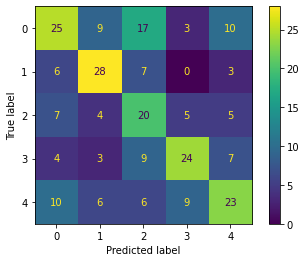

In [7]:
plot_confusion_matrix(clf, X_test, y_test)

## Esercizio 1

Notiamo come i risultati ottenuti cambino di esecuzione in esecuzione. Proviamo ad usare la k-fold validation per ottenere un risultato più "credibile".

In [8]:
def print_scores(cross_val_function):
    scores = cross_val_function
    print('Il valore medio di accuracy è {}, con una deviazione standard di {}'.format(
        round(scores.mean(), 3), 
        round(scores.std(), 3)))

print_scores(cross_val_score(clf, X, y, cv=10))

Il valore medio di accuracy è 0.511, con una deviazione standard di 0.04


## Esercizio 2

Proviamo ad usare un numero più alto di campioni, per vedere se le performance migliorano.

In [9]:
X, y = make_classification(n_samples=10000, n_informative=5, n_classes=5)
print_scores(cross_val_score(clf, X, y, cv=10))

Il valore medio di accuracy è 0.694, con una deviazione standard di 0.008


## Esercizio 3

Proviamo ad usare un tipo di classificatore differente, ovvero il `RandomForestClassifier`.

In [10]:
rf = RandomForestClassifier()
print_scores(cross_val_score(rf, X, y, cv=10))

Il valore medio di accuracy è 0.798, con una deviazione standard di 0.01


Come abbiamo visto, ci sono diversi accorgimenti che possiamo adottare per ottenere risultati migliori. Nelle prossime lezioni, vedremo come "metterli insieme", onde scegliere il miglior stimatore possibile ed effettuare alcune operazioni di preprocessing sui dati.